# Bank of America Stock Data

## 1. Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

## 2. Set File Path for CSV using Pathlib

In [2]:
# Set the file path for the CSV using the Path class from the pathlib library
BAC_path = Path("../Resources/BAC.csv")

## 3. Read the CSV into a Pandas DataFrame

In [3]:
# Define a variable "BAC_df" and store the BAC.csv into Pandas DataFrame using the BAC_path
BAC_df = pd.read_csv(BAC_path)
BAC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,22.600000,22.680000,22.200001,22.530001,22.006727,99298100
1,2017-01-04,22.719999,22.959999,22.600000,22.950001,22.416971,76875100
2,2017-01-05,22.820000,22.930000,22.350000,22.680000,22.153240,86826400
3,2017-01-06,22.780001,22.850000,22.559999,22.680000,22.153240,66281500
4,2017-01-09,22.510000,22.709999,22.400000,22.549999,22.026258,75744700


## 4. Count Number of Rows in the DataFrame

In [4]:
# Use the `count` function to count the number of non-null rows for each column
BAC_df.count()


Date         251
Open         251
High         251
Low          251
Close        251
Adj Close    251
Volume       251
dtype: int64

## 5. Calculate the Min and Max Dates

In [5]:
# Define two variables labeled "earliest_date" and "latest_date"
# Set them equal to the earliest/lastest of Date in bac_df
earliest_date = BAC_df["Date"].min()
latest_date = BAC_df["Date"].max()
# print the earliest and latest dates
print(earliest_date)
print(latest_date)

2017-01-03
2017-12-29


## 6. Set Date as Index

In [6]:
# Use the `set_index` function to set the `Date` as the index to the DataFrame
BAC_df.set_index('Date', inplace=True)
BAC_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,22.600000,22.680000,22.200001,22.530001,22.006727,99298100
2017-01-04,22.719999,22.959999,22.600000,22.950001,22.416971,76875100
2017-01-05,22.820000,22.930000,22.350000,22.680000,22.153240,86826400
2017-01-06,22.780001,22.850000,22.559999,22.680000,22.153240,66281500
2017-01-09,22.510000,22.709999,22.400000,22.549999,22.026258,75744700


## 7. Filter DataFrame Between 2017-01-03 to 2017-06-03

In [7]:
# After setting the `Date` as the index, loc can be used to specify a range of dates
six_month_filter = BAC_df.loc["2017-01-03":"2017-06-03", :]
six_month_filter.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,22.600000,22.680000,22.200001,22.530001,22.006727,99298100
2017-01-04,22.719999,22.959999,22.600000,22.950001,22.416971,76875100
2017-01-05,22.820000,22.930000,22.350000,22.680000,22.153240,86826400
2017-01-06,22.780001,22.850000,22.559999,22.680000,22.153240,66281500
2017-01-09,22.510000,22.709999,22.400000,22.549999,22.026258,75744700


## 8. Drop Extra Columns

In [11]:
# Drop the extra columns (Close is dropped because there is an Adj Close column)
six_month_closing_prices=six_month_filter.drop(columns=["Open", "High", "Low", "Close", "Volume"])
six_month_closing_prices.head()

,Adj Close
Date,
2017-01-03,22.006727
2017-01-04,22.416971
2017-01-05,22.153240
2017-01-06,22.153240
2017-01-09,22.026258


## 9. Calculate Daily Returns for Six Months of BAC Closing Prices

In [12]:
# Use the `pct_change` function to calculate the daily returns over the date range of closing BAC prices
daily_returns_for6m = six_month_closing_prices.pct_change()
daily_returns_for6m.head()

,Adj Close
Date,
2017-01-03,NaN
2017-01-04,0.018642
2017-01-05,-0.011765
2017-01-06,0.000000
2017-01-09,-0.005732


## 10. Plot the Daily Returns for 6 Months of BAC Stock

<AxesSubplot:title={'center':'Daily Return for the 6 months '}, xlabel='Date'>

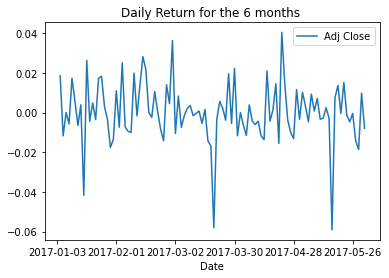

In [14]:
# Use the `plot` function to visualize the daily returns over the 6 month period for BAC
daily_returns_for6m.plot(title= "Daily Return for the 6 months ")